# Projekt z przedmiotu Podstawy Reprezentacji i Analizy Danych

### Temat Projektu - Twitter

## Część pierwsza - Eksploracyjna Analiza Danych

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# zmiana sposobu wyświetlania danych typu float
pd.options.display.float_format = "{:.2f}".format

import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
#from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn import tree
from sklearn import metrics

from sklearn.linear_model import RidgeClassifier
#from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import collections

[nltk_data] Downloading package punkt to
[nltk_data]     /home/jakubkorczakowski/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Wczytanie i czyszczenie danych

In [2]:
df = pd.read_csv("../Data/gender-classifier-DFE-791531.csv", encoding = "latin1", engine='python', usecols=[5, 6, 10, 11, 13, 14, 17, 18, 19, 21])
df.head()

,gender,gender:confidence,description,fav_number,link_color,name,retweet_count,sidebar_color,text,tweet_count
0,male,1.00,i sing my own rhythm.,0,08C2C2,sheezy0,0,FFFFFF,Robbie E Responds To Critics After Win Against...,110964
1,male,1.00,I'm the author of novels filled with family dr...,68,0084B4,DavdBurnett,0,C0DEED,ÛÏIt felt like they were my friends and I was...,7471
2,male,0.66,louis whining and squealing and all,7696,ABB8C2,lwtprettylaugh,1,C0DEED,i absolutely adore when louis starts the songs...,5617
3,male,1.00,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,0084B4,douggarland,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,1693
4,female,1.00,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,3B94D9,WilfordGemma,0,0,Watching Neighbours on Sky+ catching up with t...,31462


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 10 columns):
gender               19953 non-null object
gender:confidence    20024 non-null float64
description          16306 non-null object
fav_number           20050 non-null int64
link_color           20050 non-null object
name                 20050 non-null object
retweet_count        20050 non-null int64
sidebar_color        20050 non-null object
text                 20050 non-null object
tweet_count          20050 non-null int64
dtypes: float64(1), int64(3), object(6)
memory usage: 1.5+ MB


In [4]:
(df.isna()
 .sum(axis=0))

gender                 97
gender:confidence      26
description          3744
fav_number              0
link_color              0
name                    0
retweet_count           0
sidebar_color           0
text                    0
tweet_count             0
dtype: int64

In [5]:
df.keys()

Index(['gender', 'gender:confidence', 'description', 'fav_number',
       'link_color', 'name', 'retweet_count', 'sidebar_color', 'text',
       'tweet_count'],
      dtype='object')

## TODO Zmiana dziwnych znaków na emoji

In [6]:
str(df.loc[1, ['text']])

'text    \x89ÛÏIt felt like they were my friends and I was...\nName: 1, dtype: object'

Usunięcie rekordów z pewnością płci mniejszą niż 0.85 lub płcią nieznaną

In [7]:
df = df.where((df['gender:confidence'] > 0.9) & (df['gender'] != 'unknown')).dropna()
df.head()

,gender,gender:confidence,description,fav_number,link_color,name,retweet_count,sidebar_color,text,tweet_count
0,male,1.00,i sing my own rhythm.,0.00,08C2C2,sheezy0,0.00,FFFFFF,Robbie E Responds To Critics After Win Against...,110964.00
1,male,1.00,I'm the author of novels filled with family dr...,68.00,0084B4,DavdBurnett,0.00,C0DEED,ÛÏIt felt like they were my friends and I was...,7471.00
3,male,1.00,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202.00,0084B4,douggarland,0.00,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,1693.00
4,female,1.00,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318.00,3B94D9,WilfordGemma,0.00,0,Watching Neighbours on Sky+ catching up with t...,31462.00
5,female,1.00,you don't know me.,3901.00,F5ABB5,monroevicious,0.00,0,"Ive seen people on the train with lamps, chair...",20036.00


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11779 entries, 0 to 20049
Data columns (total 10 columns):
gender               11779 non-null object
gender:confidence    11779 non-null float64
description          11779 non-null object
fav_number           11779 non-null float64
link_color           11779 non-null object
name                 11779 non-null object
retweet_count        11779 non-null float64
sidebar_color        11779 non-null object
text                 11779 non-null object
tweet_count          11779 non-null float64
dtypes: float64(4), object(6)
memory usage: 1012.3+ KB


In [9]:
df = df.drop(columns=['gender:confidence'])

### Wykorzystanie kolumn z kolorami

In [10]:
df.link_color = df.link_color.replace(['9999', '0'], '000000')
df.sidebar_color = df.sidebar_color.replace(['9999', '0'], '000000')

In [11]:
def hexToRGB(color):
    if color == '0':
        return 255, 255, 255
    if len(color)<5:
        return 255, 255, 255
    try:
        color = color.replace(".", "")
        color = color.replace("+", "")
        r=int(color[0:2],16)
        g=int(color[2:4],16)
        b=int(color[4:6],16)
    except (RuntimeError, TypeError, NameError, ValueError):
        return None, None, None
    else:
        return r,g,b
    

Dodanie kolumn z wartościami RGB kolorów w kolumnach link_color i sidebar_color

In [12]:
#print("Zmeniam kolory z postaci #RRGGBB w wersji hex na (rr,gg,bb) w wersji dec")
df["link_color_R"] = df["link_color"].apply(lambda x: hexToRGB(str(x))[0])
df["link_color_G"] = df["link_color"].apply(lambda x: hexToRGB(str(x))[1])
df["link_color_B"] = df["link_color"].apply(lambda x: hexToRGB(str(x))[2])
df["sidebar_color_R"] = df["sidebar_color"].apply(lambda x: hexToRGB(str(x))[0])
df["sidebar_color_G"] = df["sidebar_color"].apply(lambda x: hexToRGB(str(x))[1])
df["sidebar_color_B"] = df["sidebar_color"].apply(lambda x: hexToRGB(str(x))[2])

df = df.dropna()
df.loc[:, ['link_color', 'sidebar_color', 'link_color_R', 'link_color_G', 'link_color_B', 'sidebar_color_R', 'sidebar_color_G', 'sidebar_color_B']].head()

,link_color,sidebar_color,link_color_R,link_color_G,link_color_B,sidebar_color_R,sidebar_color_G,sidebar_color_B
0,08C2C2,FFFFFF,8.00,194.00,194.00,255,255,255
1,0084B4,C0DEED,0.00,132.00,180.00,192,222,237
3,0084B4,C0DEED,0.00,132.00,180.00,192,222,237
4,3B94D9,000000,59.00,148.00,217.00,0,0,0
5,F5ABB5,000000,245.00,171.00,181.00,0,0,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11778 entries, 0 to 20049
Data columns (total 15 columns):
gender             11778 non-null object
description        11778 non-null object
fav_number         11778 non-null float64
link_color         11778 non-null object
name               11778 non-null object
retweet_count      11778 non-null float64
sidebar_color      11778 non-null object
text               11778 non-null object
tweet_count        11778 non-null float64
link_color_R       11778 non-null float64
link_color_G       11778 non-null float64
link_color_B       11778 non-null float64
sidebar_color_R    11778 non-null int64
sidebar_color_G    11778 non-null int64
sidebar_color_B    11778 non-null int64
dtypes: float64(6), int64(3), object(6)
memory usage: 1.4+ MB


Text(0.5, 1.0, 'Most used link colors by men')

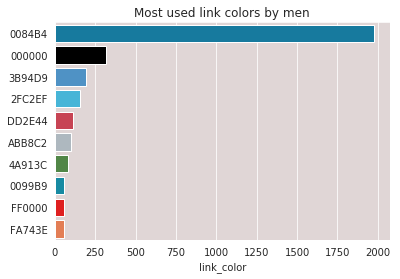

In [14]:
male_top_link_color = df[df['gender'] == 'male']['link_color'].value_counts().head(10)
male_top_link_color_idx = male_top_link_color.index
male_top_color = male_top_link_color_idx.values

#print (male_top_color)
l = lambda x: '#'+x

sns.set_style("darkgrid", {"axes.facecolor": "#E0D6D6"})
sns.barplot(x = male_top_link_color, y = male_top_color , palette=list(map(l, male_top_color))).set_title('Most used link colors by men')

Text(0.5, 1.0, 'Most used link colors by women')

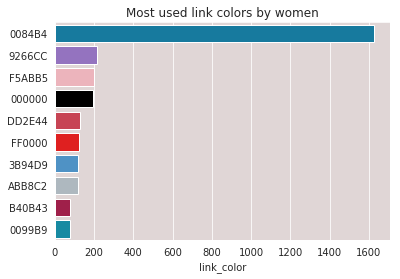

In [15]:
female_top_link_color = df[df['gender'] == 'female']['link_color'].value_counts().head(10)
female_top_link_color_idx = female_top_link_color.index
female_top_color = female_top_link_color_idx.values

#print (female_top_color)
l = lambda x: '#'+x

sns.set_style("darkgrid", {"axes.facecolor": "#E0D6D6"})
sns.barplot (x = female_top_link_color, y = female_top_color , palette=list(map(l, female_top_color))).set_title('Most used link colors by women')

Text(0.5, 1.0, 'Most used link colors by brands')

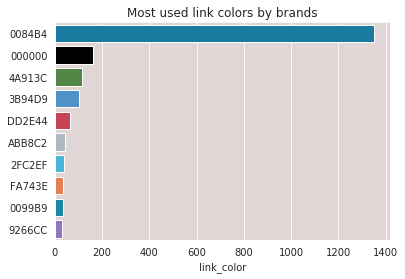

In [16]:
brand_top_link_color = df[df['gender'] == 'brand']['link_color'].value_counts().head(10)
brand_top_link_color_idx = brand_top_link_color.index
brand_top_color = brand_top_link_color_idx.values

#print (brand_top_color)
l = lambda x: '#'+x

sns.set_style("darkgrid", {"axes.facecolor": "#E0D6D6"})
sns.barplot (x = brand_top_link_color, y = brand_top_color , palette=list(map(l, brand_top_color))).set_title('Most used link colors by brands')

Najczęściej wybieranym kolorem linku przez użytkowników Twittera jest kolor niebieski. W przypadku kolejnych kolorów kolejności występują różnicę. Drugim najczęściej wybieranym kolorem jest fioletowy dla kobiet, inny odcień niebieskiego dla mężczyzn oraz zielony dla firm. Ze względu na różnicę w wykresach, kolor linku jako atrybut może być przydatny.

['C0DEED' 'FFFFFF' '000000' 'EEEEEE' '181A1E' 'A8C7F7' '5ED4DC' 'BDDCAD'
 '65B0DA' '86A4A6']


Text(0.5, 1.0, 'Most used sidebar colors by men')

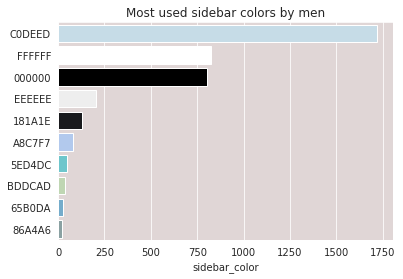

In [17]:
male_top_sidebar_color = df[df['gender'] == 'male']['sidebar_color'].value_counts().head(10)
male_top_sidebar_color_idx = male_top_sidebar_color.index
male_top_color = male_top_sidebar_color_idx.values

print (male_top_color)
l = lambda x: '#'+x

sns.set_style("darkgrid", {"axes.facecolor": "#E0D6D6"})
sns.barplot (x = male_top_sidebar_color, y = male_top_color , palette=list(map(l, male_top_color))).set_title('Most used sidebar colors by men')

['C0DEED' 'FFFFFF' '000000' 'EEEEEE' '65B0DA' '5ED4DC' '181A1E' 'CC3366'
 '829D5E' 'DBE9ED']


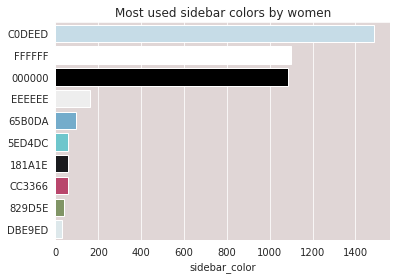

In [18]:
female_top_sidebar_color = df[df['gender'] == 'female']['sidebar_color'].value_counts().head(10)
female_top_sidebar_color_idx = female_top_sidebar_color.index
female_top_color = female_top_sidebar_color_idx.values

print (female_top_color)
l = lambda x: '#'+x

sns.set_style("darkgrid", {"axes.facecolor": "#E0D6D6"})
plot4 =sns.barplot (x = female_top_sidebar_color, y = female_top_color, palette=list(map(l, female_top_color))).set_title('Most used sidebar colors by women')

Text(0.5, 1.0, 'Most used sidebar colors by brands')

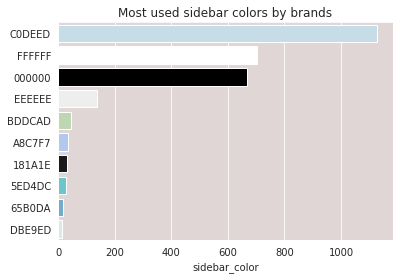

In [19]:
brand_top_sidebar_color = df[df['gender'] == 'brand']['sidebar_color'].value_counts().head(10)
brand_top_sidebar_color_idx = brand_top_sidebar_color.index
brand_top_color = brand_top_sidebar_color_idx.values

#print (brand_top_color)
l = lambda x: '#'+x

sns.set_style("darkgrid", {"axes.facecolor": "#E0D6D6"})
sns.barplot (x = brand_top_sidebar_color, y = brand_top_color , palette=list(map(l, brand_top_color))).set_title('Most used sidebar colors by brands')

Cztery najczęściej używane kolory paska bocznego są takie same dla mężczyzn, kobiet i firm. Są to niebieski, biały, czarny i szary. Ze względu na brak różnic między grupami, kolor paska bocznego nie będzie atrybutem przydatnym podczas decydowania o przynależności do grup.

## Retweet_count, Fav_number i Tweet_count w zależności od płci

In [20]:
gfn_mean = (df.loc[:, ['gender', 'fav_number']]
            .groupby('gender')
            .mean()
            .sort_values(by='fav_number'))
gfn_mean

,fav_number
gender,
brand,2009.19
male,4801.83
female,6369.06


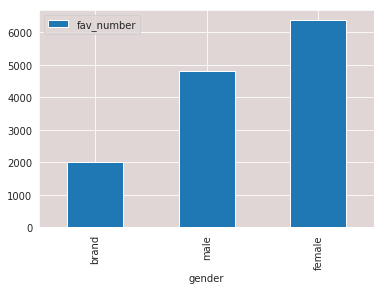

In [21]:
gfn_mean.plot.bar()

In [22]:
gtc_mean = (df.loc[:, ['gender', 'tweet_count']]
            .groupby('gender')
            .mean()
            .sort_values(by='tweet_count'))
gtc_mean

,tweet_count
gender,
female,26065.72
male,31268.01
brand,70313.51


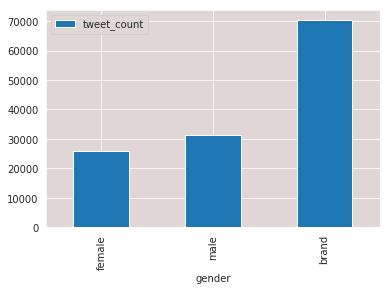

In [23]:
gtc_mean.plot.bar()

In [24]:
grc_mean = (df.loc[:, ['gender', 'retweet_count']]
            .groupby('gender')
            .mean()
            .sort_values(by='retweet_count'))
grc_mean

,retweet_count
gender,
female,0.03
brand,0.09
male,0.12


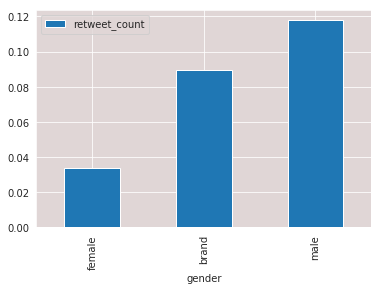

In [25]:
grc_mean.plot.bar()

In [26]:
(df.loc[:, 'link_color']
         .value_counts()
         #.groupby('link_color')
         #   
         #.sort_values(by='gender', ascending=False)
         .head(10)
        )


0084B4    4948
000000     676
3B94D9     412
DD2E44     308
9266CC     299
4A913C     264
ABB8C2     263
2FC2EF     251
F5ABB5     225
FF0000     210
Name: link_color, dtype: int64

# Usuwanie znaków specjalnych z tekstu i opisu

Funckja usuwająca znaki spoza systemu ASCII, linki, znaki specjalne oraz podwójne spacje

In [27]:
def normalize_text(text):
    text = text.lower()
    
    # Usuń znaki spoza ASCII
    text = re.sub('[^\x00-\x7F]+',' ', text)
    
    # Usuń linki
    text = re.sub('https?:\/\/.*[\r\n] ', ' ', text)
    
    # Usuń znaki specjalne
    text = re.sub('[?!+%{}:;.,#"\'()\[\]_#\&-]', '',text) #@&-
    
    # Usuń podwójne spacje
    text = re.sub('\s+',' ',text)
    
    return text

W orginalnej tabeli zostają stworzone trzy dodatkowe kolumny. Jedna ('tekst_norm') jest znormalizowanym tekstem tweeta, druga ('description_norm') jest znormalizowanym opisem oraz trzecia ('all_text') jest połączeniem znormalizowanych tekstu i opisu.

In [28]:
df['text_norm'] = [normalize_text(text) for text in df['text']]
df['description_norm'] = [normalize_text(text) for text in df['description']]
df['all_text'] = df['text_norm'].str.cat(df['description_norm'],sep=' ')

df = df.reset_index(drop=True)

# Wizualizacja najczęściej używanych słów ze względu na płeć

Funckja tworząca wykresy najczęściej użytych słów dla płci oraz dla wybranego tekstu. 

In [29]:
def plot_common_words(gender, text_name):
    X = df[df['gender'] == gender][[text_name]]
    X.columns=['Text']
    text = X['Text'].tolist()

    tokens = []

    for item in text:
        tokens.append(word_tokenize(item))

    words = []

    for item in tokens:
        words = words + item

    counter = dict(collections.Counter(words))
    counter_df = pd.DataFrame.from_dict(counter, orient='index').reset_index().rename(columns={'index':'word', 0:'count'})
    counter_df = counter_df.sort_values(by=['count'], ascending=False).head(10)
    
    plt.figure(figsize=(14, 7))
    plt.barh(counter_df['word'], counter_df['count'])
    plt.title('Most used words by ' + gender + 's for ' + text_name)
    plt.xlabel('frequency')
    plt.ylabel('words')
    plt.gca().invert_yaxis()
    plt.show()

Użycie funkcji, dla wszystkich płci, dla połączonego tekstu tweeta i opisu.

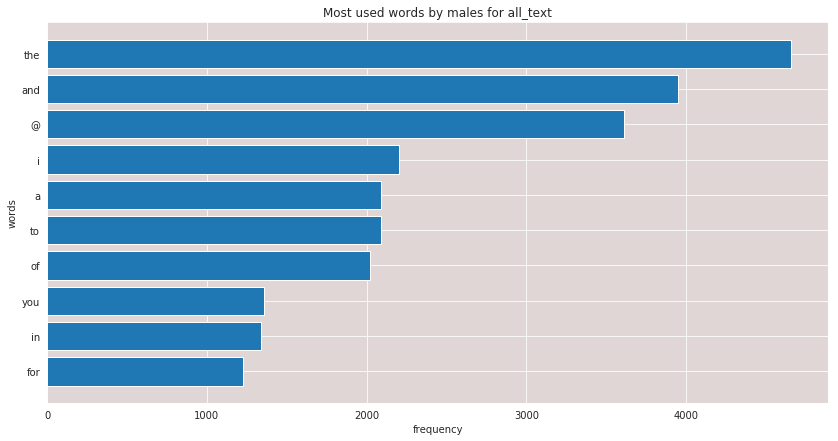

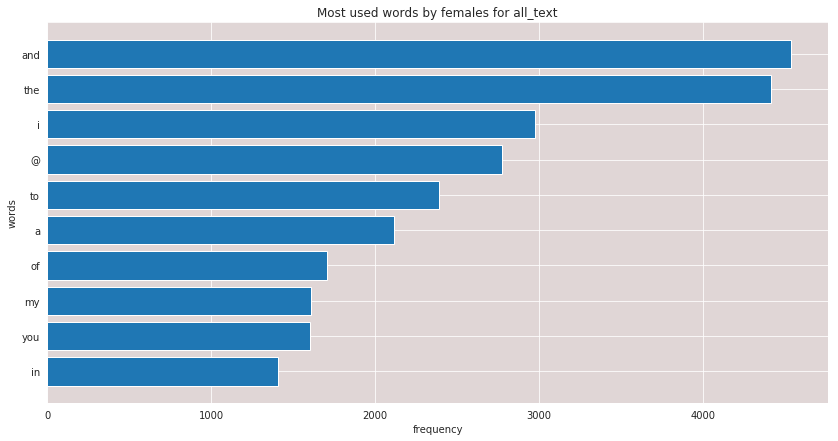

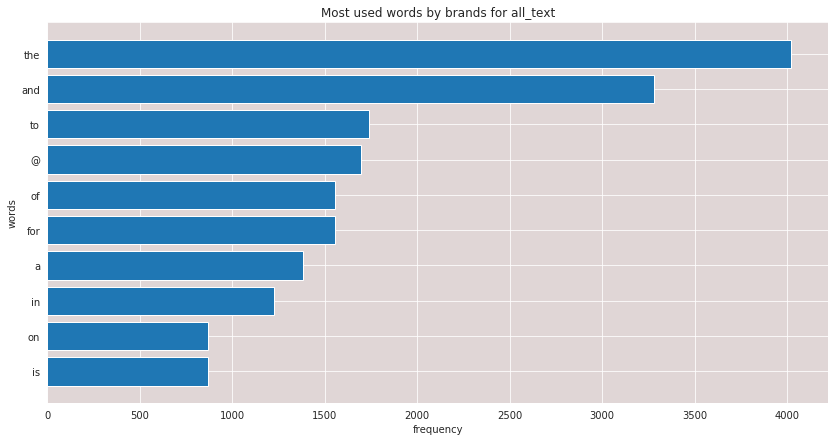

In [30]:
# all text
plot_common_words('male', 'all_text')
plot_common_words('female', 'all_text')
plot_common_words('brand', 'all_text')

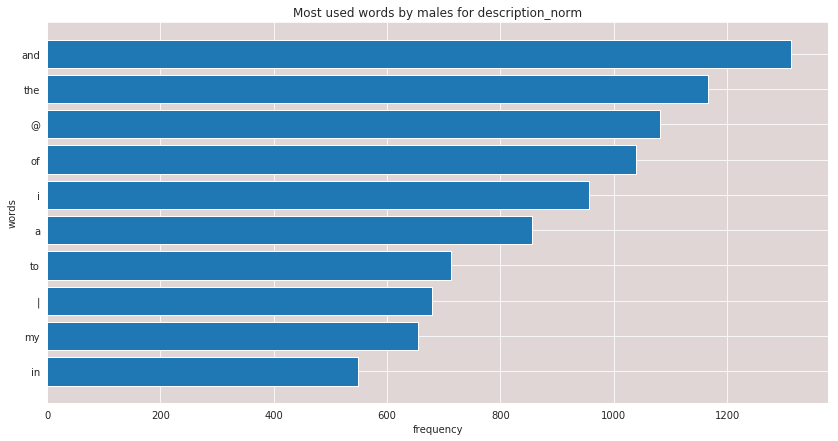

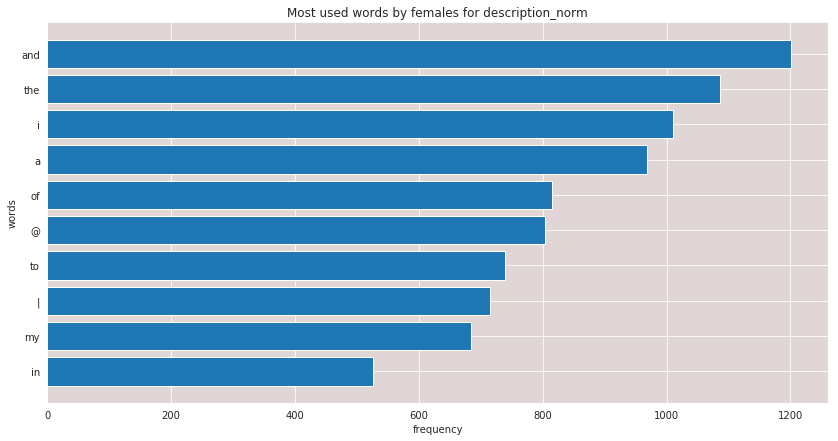

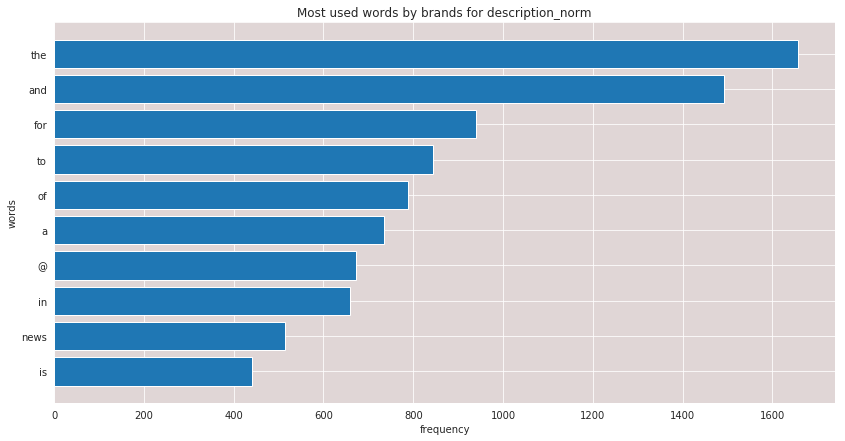

In [31]:
# description text
plot_common_words('male', 'description_norm')
plot_common_words('female', 'description_norm')
plot_common_words('brand', 'description_norm')

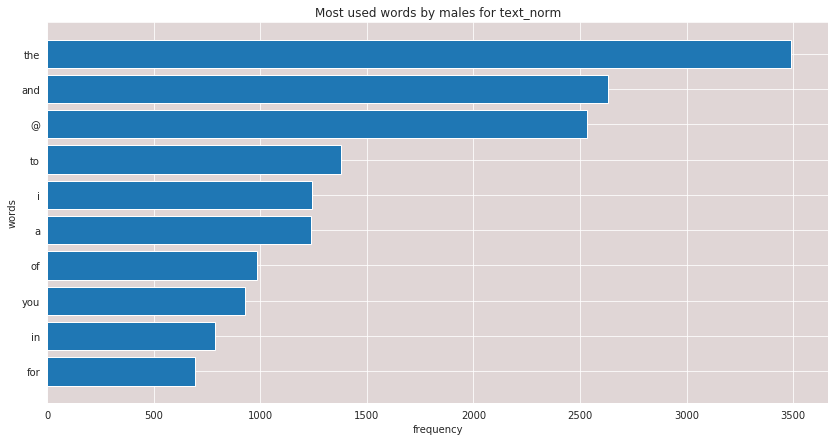

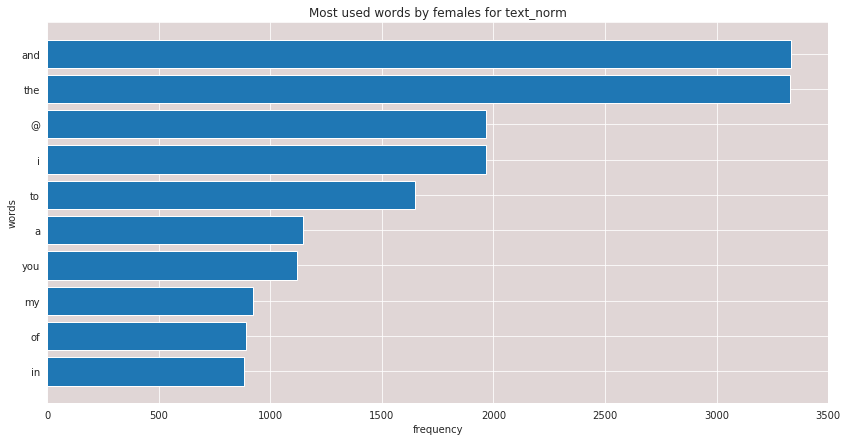

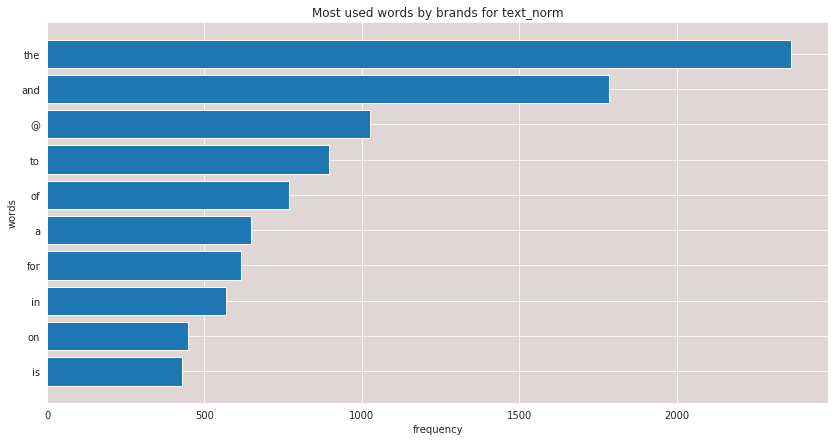

In [32]:
# text
plot_common_words('male', 'text_norm')
plot_common_words('female', 'text_norm')
plot_common_words('brand', 'text_norm')

# Przewidywanie płci

Funkcja wykorzystująca __naiwny klasyfikator bayesowski__, przewidująca jakiej płci jest użytkownik, na podstawie wybranego tekstu.

In [ ]:
RidgeClassifier
LinearSVC
SGDClassifier
Perceptron
PassiveAggressiveClassifier
BernoulliNB
MultinomialNB
KNeighborsClassifier
NearestCentroid
RandomForestClassifier

In [208]:
def predict_for_set(data_set, text):
    X = data_set[[text]]
    y = data_set[['gender']]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    count_vect = CountVectorizer()
    X_train_vect = count_vect.fit_transform(X_train.iloc[:, 0])
    X_test_vect = count_vect.transform(X_test.iloc[:, 0])

    tfidf_transformer = TfidfTransformer()
    X_train_tfidf = tfidf_transformer.fit_transform(X_train_vect)
    X_test_tfidf = tfidf_transformer.fit_transform(X_test_vect)

    alg = RidgeClassifier().fit(X_train_tfidf, y_train)

    y_pred = alg.predict(X_test_tfidf)
    
    y_pred_tr = alg.predict(X_train_tfidf)
    
    print("Accuracy dla zbioru testowego")
    print(metrics.accuracy_score(y_test, y_pred))
    print("Accuracy dla zbioru uczącego")
    print(metrics.accuracy_score(y_train, y_pred_tr))

    
    #print(y_test.to_numpy().transpose()[0])
    #print(y_pred)
    
    print("Macierz pomyłek dla zbioru uczącego")
    print(pd.crosstab(y_train.to_numpy().transpose()[0], y_pred_tr)) 
    sns.heatmap(pd.crosstab(y_train.to_numpy().transpose()[0], y_pred_tr),
            cmap="YlGnBu", annot=True, cbar=False)
    
    #print("Macierz pomyłek dla zbioru testowego")
    #print(pd.crosstab(y_test.to_numpy().transpose()[0], y_pred)) 
    #sns.heatmap(pd.crosstab(y_test.to_numpy().transpose()[0], y_pred),
    #        cmap="YlGnBu", annot=True, cbar=False)
    #print("Macierz pomyłek dla zbioru testowego")
    #print(pd.crosstab(y_test, y_pred)) 
    
    #print(metrics.precision_score(y_test, y_pred))
    #print(metrics.recall_score(y_test, y_pred))

Przewidywanie płci na podstawie tesktu tweeta

Prediction for text: 

/home/jakubkorczakowski/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:839: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy dla zbioru testowego
0.5377758913412564
Accuracy dla zbioru uczącego
0.9565909573338994
Macierz pomyłek dla zbioru uczącego
col_0   brand  female  male
row_0                      
brand    2349      39    38
female     35    3562    74
male       31     192  3102


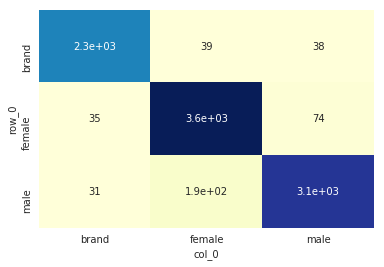

In [209]:
print('Prediction for text: ', end='')
a = predict_for_set(df, 'text_norm')


Przewidywanie płci na podstawie tekstu tweeta i opisu

In [116]:
print('Prediction for text and description combined: ', end='')
predict_for_set(df, 'all_text')

Prediction for text and description combined: 

/home/jakubkorczakowski/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:839: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6612903225806451


Przewidywanie płci na podstawie opisu

In [117]:
print('Prediction for description: ', end='')
predict_for_set(df, 'description_norm')

Prediction for description: 

/home/jakubkorczakowski/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:839: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6820882852292021


Jak widać najlepszy wynik uzyskaliśmy używając tylko opisu.

# Inne modele

In [82]:
def podziel(df,proporcja):
    # dzieli macierz (ramkę) danych na zbiór uczacy i testowy
    # df - ramka danych; proporcja - proporcja podzialu (0-1)
    # zwraca słownik z kluczami:
    # opis_ucz/opis_test - macierz atrybutów opisujących zbioru uczącego/testowego
    # dec_ucz/dec_test - wektor wartosci atrybutu decyzyjnego zbioru uczącego/testowego
    # uwaga: atrybut opisujący jest zawsze na końcu (ostatnia kolumna ramki)
    opis_ucz, opis_test, dec_ucz, dec_test = train_test_split(df.iloc[:,0:-1], df.iloc[:,-1].astype('category').cat.codes, test_size=proporcja)#, random_state=0)
    return {"opis_ucz":opis_ucz, "opis_test":opis_test, "dec_ucz":dec_ucz, "dec_test":dec_test}

In [83]:
def weryfikuj(model,dane,atryb):
    # wyswietla wynik weryfikacji klasyfikatora w postaci macierzy pomyłek
    # dla zbioru uczącego i testowego
    # model - model klasyfikatora
    # dane - dane (słownik zwracany przez funkcje podziel)
    # atryb - lista atrybutów uwzględnianych w weryfikacji
    model.fit(dane["opis_ucz"].iloc[:,atryb], dane["dec_ucz"])
    wynik_ucz = model.predict(dane["opis_ucz"].iloc[:,atryb])
    wynik_test = model.predict(dane["opis_test"].iloc[:,atryb])
    print("Macierz pomyłek dla zbioru uczącego")
    print(pd.crosstab(dane["dec_ucz"],wynik_ucz)) 
    print("Macierz pomyłek dla zbioru testowego")
    print(pd.crosstab(dane["dec_test"],wynik_test)) 